<Axes: xlabel='Date'>

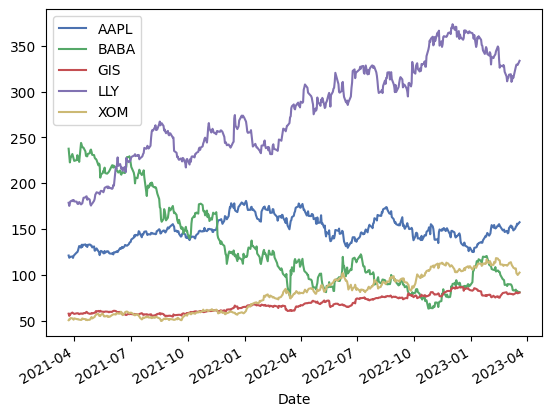

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import numpy as np
import pandas as pd
import copy

stocks = pd.read_pickle("../Datas/['AAPL', 'BABA', 'XOM', 'GIS', 'LLY'].pkl")

stocks.plot()

### Mean-Variance Optimal Portfolio
- Need Expected returns for each stocks
- Need the covariance matrix of all stocks returns
- Minimizing the portfolio varianc
- Efficient frontier -> point that maximize the Sharpe ratio


### Returns / Mean_historical_Expected_returns

AAPL    0.141045
BABA   -0.418090
GIS     0.184367
LLY     0.369004
XOM     0.427386
dtype: float64

<Axes: xlabel='Date'>

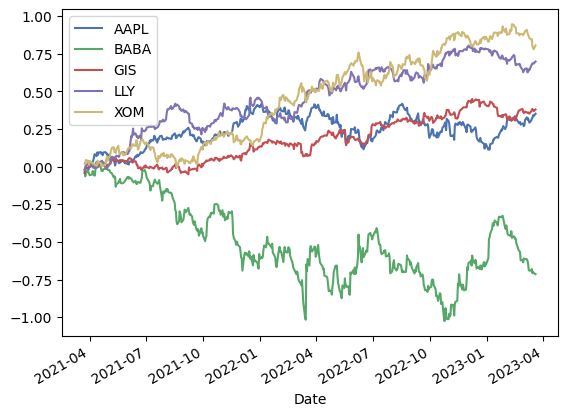

In [2]:
stocks_returns = stocks.pct_change()[1:]
stocks_returns.head()
exp_ret = expected_returns.mean_historical_return(stocks)
display(exp_ret)
stocks.pct_change()[1:].cumsum().plot()

### Variance / Covariance Matrix

,AAPL,BABA,GIS,LLY,XOM
AAPL,0.089864,0.057200,0.009597,0.022842,0.021634
BABA,0.057200,0.380281,-0.007701,0.005847,0.023985
GIS,0.009597,-0.007701,0.043554,0.014688,0.003627
LLY,0.022842,0.005847,0.014688,0.074845,0.010502
XOM,0.021634,0.023985,0.003627,0.010502,0.098355


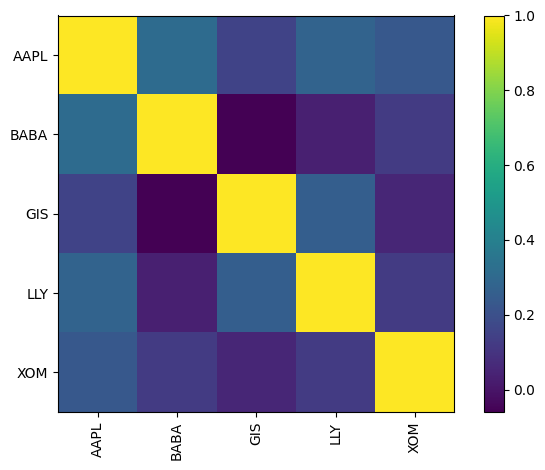

In [3]:
# variance / covariance matrix
cov_matrix2 = risk_models.sample_cov(stocks)
display(cov_matrix2)
plotting.plot_covariance(cov_matrix2, plot_correlation=True);


### Efficient Frontier for maximizing sharpe ratio

In [8]:
from pypfopt import objective_functions

ef = EfficientFrontier(exp_ret, cov_matrix2)
# optimizing to have less negligible weights 
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
w = ef.max_sharpe()
print(ef.clean_weights())


OrderedDict([('AAPL', 0.03309), ('BABA', 0.0), ('GIS', 0.18933), ('LLY', 0.37394), ('XOM', 0.40364)])


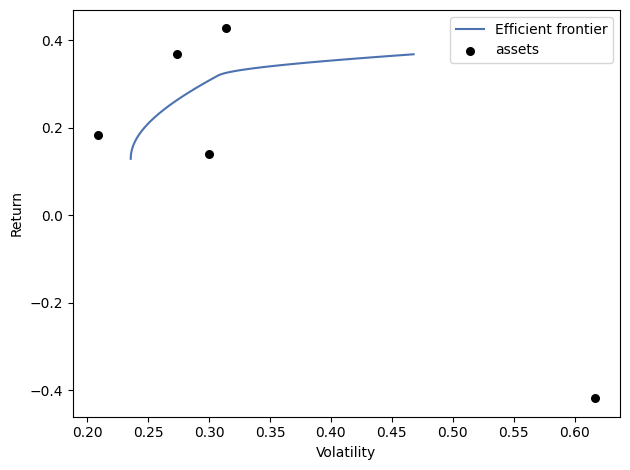

In [5]:
ef = EfficientFrontier(exp_ret, cov_matrix2, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

### Portefolio Weights

In [6]:
ef.portfolio_performance(verbose=True)


Expected annual return: 36.8%
Annual volatility: 46.8%
Sharpe Ratio: 0.74


(0.36840106531849875, 0.467827591980902, 0.7447210709468401)